# Cogs 118A - Group 053 Final Project

## Group members
- Erlend Hordvei
- Adam Alvord
- Ethan Black
- Cedric Wong

# Abstract
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Language detection can be difficult for machines, but humans with some exposure to a given language can recognize it even if they aren’t fluent. The goal of this project was to create a supervised machine learning algorithm that can predict what language a word comes from based on the phonemes (speech-sounds) present. We found a dataset of around 4 million words in 28 different languages and their translations into the International Phonetic Alphabet (IPA). IPA codifies words based on their pronunciation, with individual characters each representing a phoneme. We used 5-fold cross validation to determine the optimal maximum tree depth, and found that our highest average accuracy occurred at a max depth of 40. After training, we viewed the prediction accuracy of our testing set to evaluate our model’s performance.

# Background

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Identification of natural languages is a topic that has undergone many studies in the past. This task is often trivial for human translators, but coding a computer to do this has a much higher difficulty, and even human translators are known to make mistakes when it comes to obscure languages <a name="beesley"></a>[<sup>[1]</sup>](#beesleynote). There are a few different possible approaches. First is to match the words by letters, and their presence in each language. Alternatively, it can be done matching entire words that appear in multiple languages <a name="beesley"></a>[<sup>[1]</sup>](#beesleynote). Souter's article suggests using combinations of two or three letters, having the algorithm split each word <a name="souter"></a>[<sup>[2]</sup>](#souternote).
 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Our original data is already conveniently separated into phonemes, which lowers the amount of cleaning needed to simple reshaping and merging. We used far less regex text processing than is done in other research on this topic <a name="saji"></a>[<sup>[3]</sup>](#sajinote). Unlike the experiment by Saji, we did not use an 80%-20% train-test split, and instead opted to split our data into 5-folds so we could perform some cross validation and optimize our max depth.
 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; We also consulted Dr. Will Styler in the linguistics department at UCSD and asked if he had any insights. With his guidance, we determined that a decision tree will best help us probabilistically determine language labels, as decision trees are commonly used in linguistics research of this kind. He also recommended we look into doing a bi-gram or n-gram analysis, where we look not only at the frequency of individual phonemes, but also the frequency of pairs or groups of phonemes in sequence.


# Problem Statement

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Identification of languages can be exceptionally difficult for humans with no exposure to them. Humans excel in discerning speech-sounds from their native language’s phonetic inventory since they have been trained to do so since birth, but this comes at a cost. It’s often difficult for speakers of a given language to distinguish between, or to produce, phonemes that are outside of their phonetic inventory.
 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; This project aims to assist in language recognition using IPA and statistical, supervised machine learning. In order to do so, we trained our algorithm on the phonetic inventories of 13 different languages from our dataset. We were then able to calculate the probability of a novel word’s origin based on the phonemes it contains, their frequency in the word, and their frequency in each language. One issue we encountered, however, was that not all of our language sets are the same size, meaning some languages would be over or under represented.


# Data

Our dataset: ipa-dic - https://github.com/open-dict-data/ipa-dict/releases

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The ipa-dict database contains dictionaries extracted from a number of different sources. There were some incompatibilities between the formats of each dictionary we needed to resolve. To get a dataset that would work for our model, we parsed the IPA characters in the files and produced frequency counts of every phoneme for each word to represent them in our dataset, and assigned the categorical language data based on the file we extracted each word from.
  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Some of the dictionary files are significantly different in size, because many languages are linguistically under-documented. We’d like to keep this difference in mind while splitting our training and testing data, and plan to do so by taking a random 20% of each language’s dictionary for testing.
  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The original data is organized into 28 files containing one language dictionary, each with a number of words written in the International Phonetic Alphabet (IPA). In total, there are around 4 million words (3,890,537) across all 28 languages. IPA is a system of writing that allows linguists to textually represent words using phonemes. A phoneme is an individual speech-sound, for example, the “c” in the English word “cat” is represented as “k”. For more information about IPA, check out the official site: https://www.internationalphoneticalphabet.org/. We removed several of these languages, for a final subset of 15. Several of the language files in the dataset were dialects of the same language, which are very difficult to properly distinguish, and some of the data formatting for a few of the files was incompatible with our data cleaning.
 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Our major variables were; (1) what category, or language of origin, each word in our dictionaries belongs to; (2) what phonemes are present in a given word, and how frequently they appear.
 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; We’ve cleaned our data and separated it into two matrices; X (our data) and Y (the language labels for our data). Our X matrix is of the shape N x D, where D (our dimensions/columns) are phonemes across all of the languages present, and N (our words/rows) are the individual words of our combined dictionaries. Our Y matrix is of the shape N x L, where L is the number of languages we have. Y is one-hot encoded so we know the origin language of each of our words.
 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; We have encoded each word/observation in X as a frequency count of each phoneme For example, the English word “cat” in IPA is “kæt”, and would be encoded as a row of 0s, with 1s in the columns for “k”, “æ”, and “t”, since there is one of each present. Alternatively, the English word “women” in IPA is “wɪmɪn”, and would be encoded as a row of 0s with 1s in the columns for “w”, “m”, and “n”, and 2 in the column for “ɪ”, since it appears twice.

If you'd like to see more about how we pre-processed our data, check out the "data_cleaning.py" file in our GitHub Repo.

# Proposed Solution

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; In order to produce a model which can discriminate between different languages, a classification model is the best fit. Intuitively, a variant of the Decision Tree made sense to us, as some of these languages have phonemes that may be exclusive to their inventory and a decision tree is equipped to handle that sort of clearly discernible difference.
 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; To solve our over/under representation problem. We took 5-folds from each language individually, and then compiled them into our final 5-folds for cross-validation. This ensures that each fold contains 20% of a given language’s word list, and each language is equally represented during our cross-validation, training, and testing.

# Evaluation Metrics

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; We evaluated our model based on its testing accuracy. We took a score of both how accurately we can generally classify novel words (i.e. how often we get the correct categorization), as well as accuracy across individual languages or groups of languages. This way we can see trends between how often we can predict the exact language of origin, as well as how well we can discern linguistic groups like latin-descended or germanic-descended languages.
 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; There were far more than 2 categories in this experiment, so when using the confusion matrix we measured accuracy based on correct classifications divided by all classifications. We could also have calculated precision and recall by choosing a particular language, then dividing correct classifications by words incorrectly classified as belonging to that language and words incorrectly classified as not belonging to that language, respectively.

# Results

### Initial Thoughts & Model Selection
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The nature of our problem requires a big dataset to be able to differentiate these often similar languages (for example, Spain Spanish and Mexican Spanish). Because we have one feature for each of the possible phonemes over all of the languages in the dataset, many classifiers found trouble fitting the model in a reasonable amount of time. Adding this to the fact that our chosen classifier would have to pick between many classes, some algorithms stood out in our decision process. We ended up trying Random Forest, K-Nearest Neighbor, and Decision Tree. By comparing the performance of these algorithms, we ended up using a Decision Tree because it had the best test results, and were able to fit the model within a reasonable time frame.
 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Creating classifiers for big datasets like ours takes a lot of computation and time, so we wanted to start slow. We originally tried analyzing 8 languages using a random forest decision tree, and a regular decision tree. We started with 8 languages that were of a similar phonetic inventory; Swahili, Norwegian, Swedish, Finnish, German, English (US), Vietnamese (Central), and French (France). The dataset from these 8 languages included 894,677 data points. Creating a decision tree with our preliminary data, we were able to obtain an accuracy of about 97.3%. We’ve included a visualization of our decision tree out to a depth of 5 below:


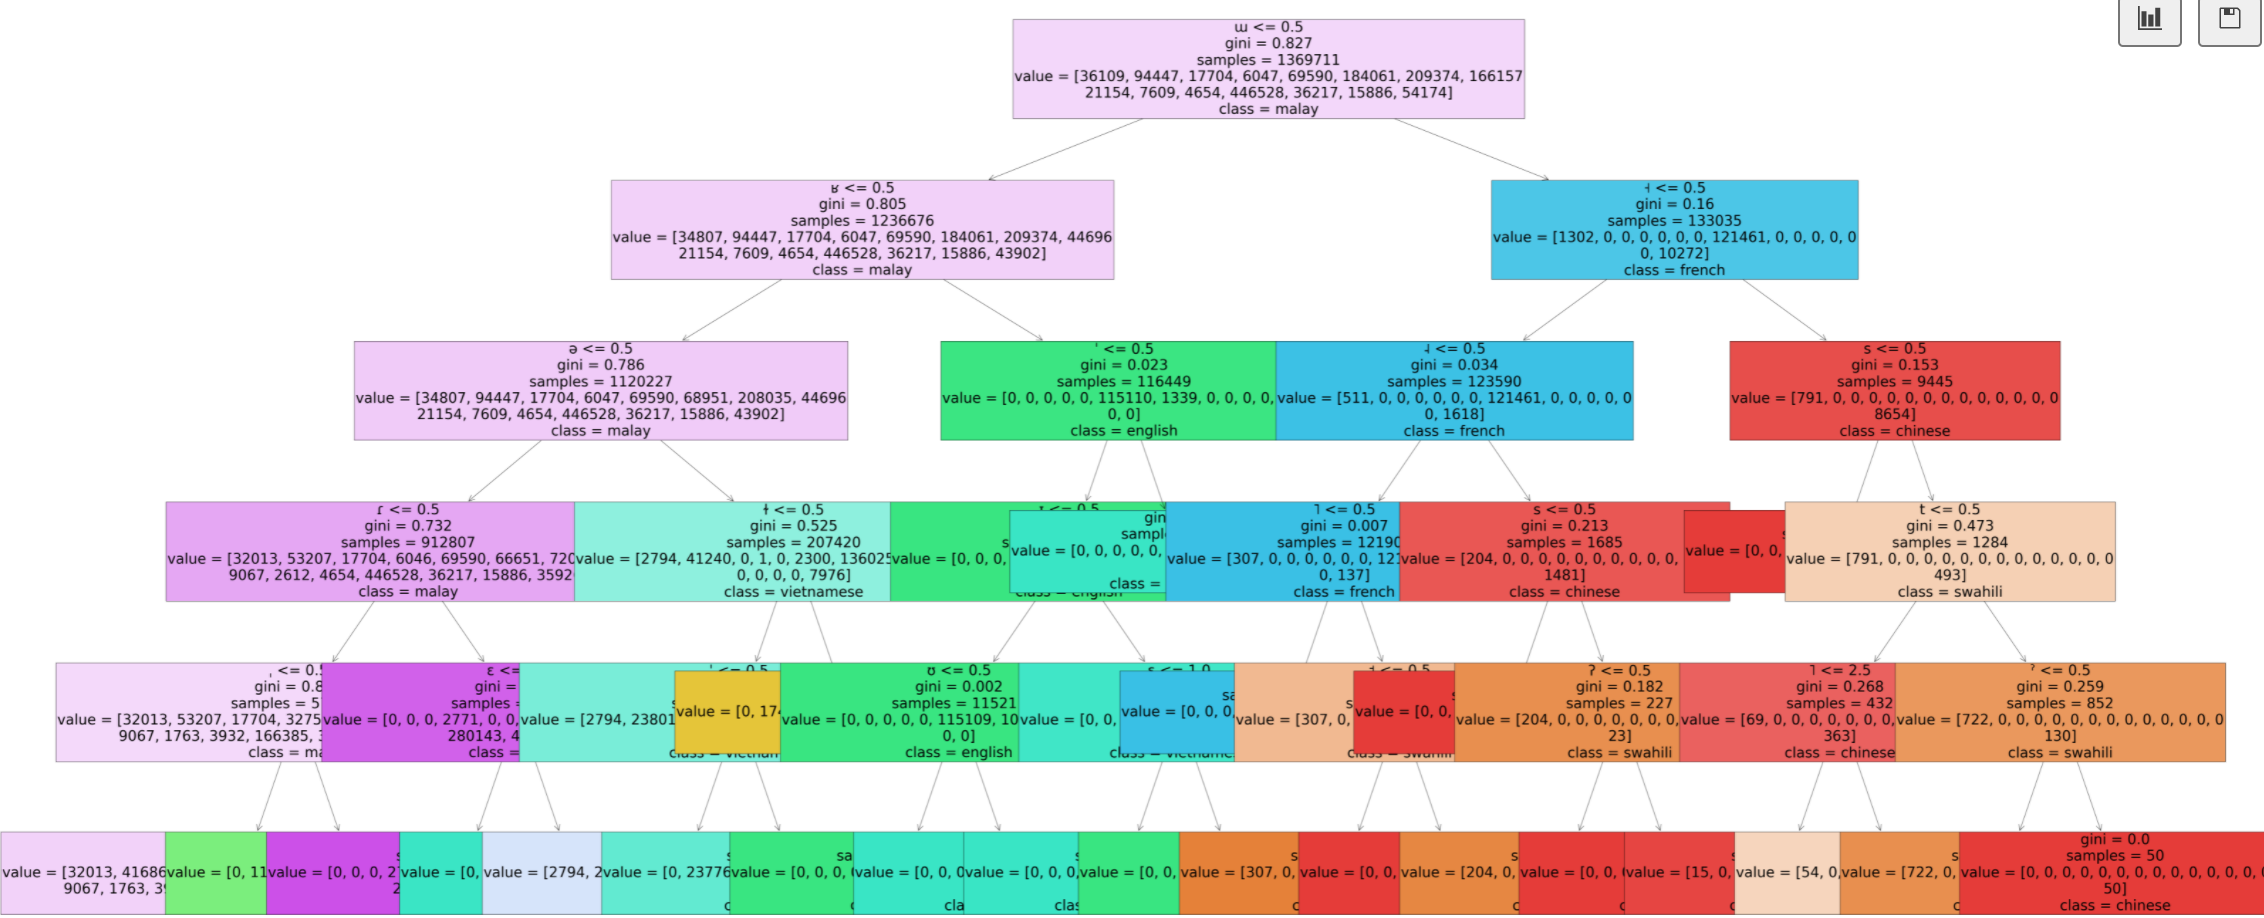

### Determining Hyperparameters

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Below is the code used to try different max depths for our decision tree. To choose the best hyperparameters for the decision tree we performed a grid search with 5-fold cross validation over 3 different max depth values. This returned a pretty high testing accuracy overall, that scaled higher as our tree got deeper. We decided to go up to a max depth of 40 so our model could maintain a good accuracy without increasing the risk of higher generalization error through overfitting by using an extremely high max depth.

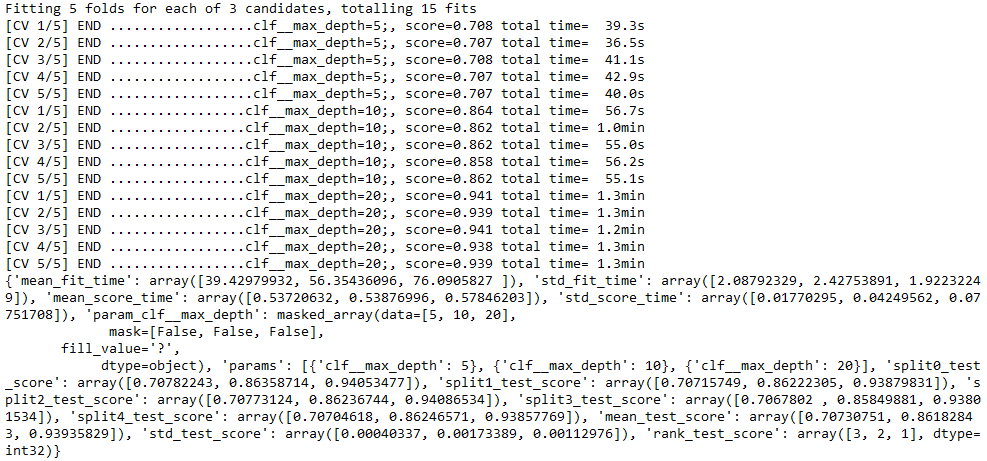

### Confusion Matrix
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Below is the plot of the confusion matrix of the fitted model with max depth 20. Testing the fitted model on the test set gives us 97.4% correctly classified words. The model is good at distinguishing Vietnamese and Swedish from the other languages. Vietnamese is the only asian language included so far so that is not surprising, but we are impressed by the models ability to distinguish Swedish from the other European languages. Especially Norwegian considering that people speaking Norwegian and Swedish can easily communicate with one another. The model has difficulties correctly classifying the Norwegian words, but this might be due to the fact that the amount of Norwegian words in the dataset is unbalanced compared to the other languages.
 
 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Other noticeable miss classifications are English words being classified as Finnish or German, and Finnish and German words being classified as English. The model also has some problems distinguishing words from Swahili and French.

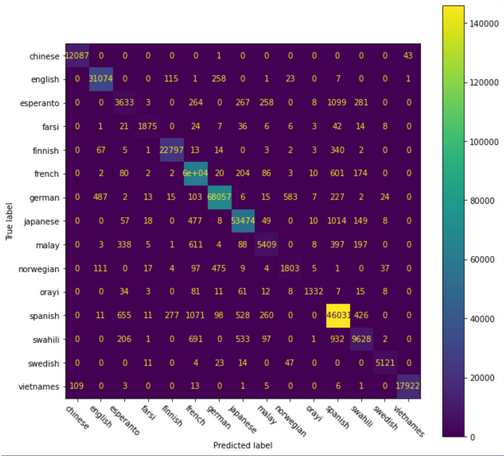

If you'd like to see our entire model fitting process, check out the "decision_tree_grid.ipynb" file in our GitHub Repo.

# Discussion

### Interpreting the Results

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Looking at the relative accuracy of each language prediction, we can make some inferences about the quality of the data for each language. The model is good at distinguishing Vietnamese and Chinese from the other languages. Both of these languages are pretty linguistically distant from the European cluster of languages, and don’t share many similar features with each other or the other selected languages, in terms of linguistic origin. It makes sense, then, that they are very distinguishable and very unlikely to have misclassifications.
 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Related to this, by seeing which languages are likely to be misclassified as each other, a pattern emerges about how different languages might be related. The most obvious connection is through their similar phonetic inventory. Languages of the same family (i.e. descendants of a shared ancestral language) tend to be misclassified more often, which intuitively makes sense. If we look at English for example, the English is mainly Germanic in origin, and misclassified English words are most commonly predicted to be German.
 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Our model seems to have the toughest time with Spanish. Spanish is the most commonly misclassified language, and the most common label for misclassified words in other languages. This was somewhat expected for other Latin-based languages like French, but the similarity to other languages was surprising. For example Esperanto, a constructed language designed to be an “international auxiliary language” created in 1887, seems to bear a great similarity to Spanish (despite being created by a Polish man). This may be because Spanish and other Latin-based languages operate on a strict 5-vowel system, as do many other languages like Japanese, Esperanto, Swahili, and Malay, which we all see some correlation with.

### Limitations

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Since Chinese is significantly different from the majority of the latin-based languages we were working with, the program used to separate the Chinese words into phonemes had to be changed to account for this. Similar problems occurred with Vietnamese and Japanese. It might be more accurate to work exclusively with latin-based languages next time.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The uneven class distribution makes the dataset imbalanced and impacts the model's ability to predict some of the languages correctly. An example is Norwegian with less than 3000 observations in the dataset compared to Spanish with more than 45,000 observations. The decision tree makes its decisions based on the amount of observations from each class along the path. The result will be a tree with very few decisions targeted to correctly classify the Norwegian words, because this does not have a big impact on the overall performance of the model. Even though it is highly imbalanced for some of the minority classes, Norwegian is still giving 70% correctly classified instances. 

### Ethics & Privacy

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; While the general function of this project may not in itself be objectionable, language dictionaries do not breach the privacy of any particular individual, the structural problems with how this sort of data is gathered were clear to us in searching for datasets to use. Centralized resources for phoneme information are fragmented, incomplete, and biased towards large languages on the whole, and that means, regardless of intent, tools developed for this functionality will disproportionately benefit those with the research apparatus in place to conduct linguistic research.
 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; In other words, underserved cultural and linguistic communities, without the wealth to conduct language research, are unlikely to benefit from these ML tools without outside funds and resources to support data gathering for this purpose. Even finding non-English IPA datasets was a bit of a challenge. Generally, an overemphasis on European interests seems to be foundationally baked into the available language datasets, and that overemphasis will likely carry over to our project.

### Conlcusion

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; We found that the results generated by a decision tree gave us some insight into the linguistic proximity of languages, both in terms of phonetic inventory and in terms of linguistic families. The misclassifications were patterned such that we could infer the proximity of languages to one another by the frequency at which they were likely to be mistaken for one another by the model. Further extensions of this work might perform a more thorough analysis of these misclassification patterns as they relate to what we currently know about language ancestry, in order to quantify how reliably a model like this might be able to assist in this sort of linguistic research.

### Footnotes
<a name="beesleynote"></a>1.[^](#beesley): Beesley, Kenneth. (1999). Language Identifier: A Computer Program for Automatic Natural-Language Identification of On-line Text. https://www.researchgate.net/publication/2391981_Language_Identifier_A_Computer_Program_for_Automatic_Natural-Language_Identification_of_On-line_Text
<br> 
<a name="souternote"></a>2.[^](#souter): Souter, C., Churcher, G., Hayes, J., Hughes, J., & Johnson, S. (1994). Natural Language Identification using Corpus- Based Models. Tisskrift.dk. Retrieved April 25, 2022, from https://tidsskrift.dk/her/article/download/25083/22006
<br>
<a name="sajinote"></a>3.[^](#saji): Saji, B. (2021, March 12). Language detection using natural language processing. Analytics Vidhya. Retrieved April 24, 2022, from https://www.analyticsvidhya.com/blog/2021/03/language-detection-using-natural-language-processing/ 